In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
import pyspark.sql.functions as fn
import pyspark.ml.feature as ml

In [2]:
spark=SparkSession.builder.appName("Logistic Reggression").getOrCreate()

23/08/03 16:24:05 WARN Utils: Your hostname, ShreyashUbuntu resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
23/08/03 16:24:05 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
23/08/03 16:24:07 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [3]:
spark_df=spark.read.csv("/home/hdoop/Downloads/Mall_Customers.csv",inferSchema=True,header=True)

In [4]:
spark_df.show()

+----------+------+---+------------------+----------------------+
|CustomerID| Genre|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
|         1|  Male| 19|                15|                    39|
|         2|  Male| 21|                15|                    81|
|         3|Female| 20|                16|                     6|
|         4|Female| 23|                16|                    77|
|         5|Female| 31|                17|                    40|
|         6|Female| 22|                17|                    76|
|         7|Female| 35|                18|                     6|
|         8|Female| 23|                18|                    94|
|         9|  Male| 64|                19|                     3|
|        10|Female| 30|                19|                    72|
|        11|  Male| 67|                19|                    14|
|        12|Female| 35|                19|                    99|
|        1

In [5]:
spark_df.describe().show()

+-------+------------------+------+-----------------+------------------+----------------------+
|summary|        CustomerID| Genre|              Age|Annual Income (k$)|Spending Score (1-100)|
+-------+------------------+------+-----------------+------------------+----------------------+
|  count|               200|   200|              200|               200|                   200|
|   mean|             100.5|  null|            38.85|             60.56|                  50.2|
| stddev|57.879184513951124|  null|13.96900733155888| 26.26472116527124|    25.823521668370173|
|    min|                 1|Female|               18|                15|                     1|
|    max|               200|  Male|               70|               137|                    99|
+-------+------------------+------+-----------------+------------------+----------------------+



In [6]:
print("shape: ",len(spark_df.columns),spark_df.count())

shape:  5 200


In [7]:
spark_df.printSchema()

root
 |-- CustomerID: integer (nullable = true)
 |-- Genre: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Annual Income (k$): integer (nullable = true)
 |-- Spending Score (1-100): integer (nullable = true)



converting spark dataframe into pandas for ploting

In [8]:
pd_df=spark_df.toPandas()

In [9]:
pd_df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


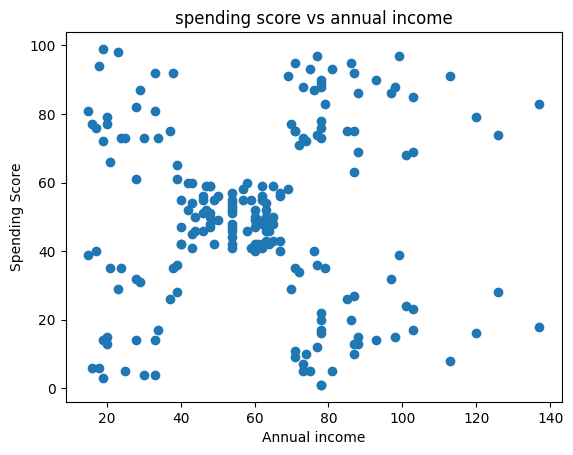

In [10]:
x_value=pd_df["Annual Income (k$)"]
y_value=pd_df["Spending Score (1-100)"]
plt.scatter(x=x_value,y=y_value)
plt.xlabel("Annual income")
plt.ylabel("Spending Score")
plt.title("spending score vs annual income")
plt.show()

In [11]:
from pyspark.ml.feature import VectorAssembler

Creating  a feature 

In [12]:
features=["Annual Income (k$)","Spending Score (1-100)"]
assembler=VectorAssembler(inputCols=features,outputCol="features")

Adding The feature

In [13]:
new_df=assembler.transform(spark_df)


In [14]:
new_df.show()

+----------+------+---+------------------+----------------------+-----------+
|CustomerID| Genre|Age|Annual Income (k$)|Spending Score (1-100)|   features|
+----------+------+---+------------------+----------------------+-----------+
|         1|  Male| 19|                15|                    39|[15.0,39.0]|
|         2|  Male| 21|                15|                    81|[15.0,81.0]|
|         3|Female| 20|                16|                     6| [16.0,6.0]|
|         4|Female| 23|                16|                    77|[16.0,77.0]|
|         5|Female| 31|                17|                    40|[17.0,40.0]|
|         6|Female| 22|                17|                    76|[17.0,76.0]|
|         7|Female| 35|                18|                     6| [18.0,6.0]|
|         8|Female| 23|                18|                    94|[18.0,94.0]|
|         9|  Male| 64|                19|                     3| [19.0,3.0]|
|        10|Female| 30|                19|                    72

Scaling the feature

In [15]:
scaler=ml.StandardScaler(inputCol="features",outputCol="Scaled_feature")
scaled_df=scaler.fit(new_df)

In [16]:
scaled_df=scaled_df.transform(new_df)
scaled_df.show()

+----------+------+---+------------------+----------------------+-----------+--------------------+
|CustomerID| Genre|Age|Annual Income (k$)|Spending Score (1-100)|   features|      Scaled_feature|
+----------+------+---+------------------+----------------------+-----------+--------------------+
|         1|  Male| 19|                15|                    39|[15.0,39.0]|[0.57110829030364...|
|         2|  Male| 21|                15|                    81|[15.0,81.0]|[0.57110829030364...|
|         3|Female| 20|                16|                     6| [16.0,6.0]|[0.60918217632388...|
|         4|Female| 23|                16|                    77|[16.0,77.0]|[0.60918217632388...|
|         5|Female| 31|                17|                    40|[17.0,40.0]|[0.64725606234413...|
|         6|Female| 22|                17|                    76|[17.0,76.0]|[0.64725606234413...|
|         7|Female| 35|                18|                     6| [18.0,6.0]|[0.68532994836437...|
|         

<h3>Creating a Elbow graph

In [27]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt

# Assuming you have your DataFrame 'dataframe' and the column name 'column'
def elbow_plot(dataframe, column, max_k):
    means = []
    cost = []
    
    # Create a VectorAssembler to combine columns into a feature vector
    assembler = VectorAssembler(inputCols=column, outputCol="feature")
    dataframe = assembler.transform(dataframe)
    
    for k in range(2, max_k + 1):
        kmeans = KMeans(featuresCol="feature", k=k)
        model = kmeans.fit(dataframe)

        means.append(k)
        cost.append(model.summary.trainingCost)
    
    plt.figure(figsize=(8, 6))
    plt.plot(means,cost,'-o')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Inertia")
    plt.title("Elbow Method for Optimal K")
    plt.grid(True)
    plt.show()





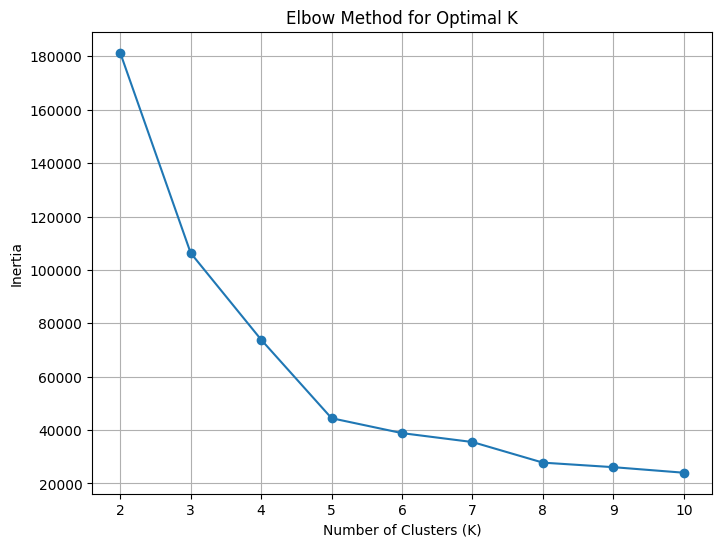

In [28]:
elbow_plot(spark_df,["Annual Income (k$)","Spending Score (1-100)"],10)

<h3>Clustering the data

In [20]:
from pyspark.ml.clustering import KMeans


In [21]:
kmeans=KMeans(featuresCol="features",k=5)

In [ ]:
kmeans=kmeans.fit(new_df)


In [ ]:
pred_data=kmeans.transform(new_df)

In [ ]:
pred_data.groupBy("prediction").count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|  101|
|         3|   11|
|         4|   38|
|         2|   22|
|         0|   28|
+----------+-----+



In [ ]:
pred_data.show()

+----------+------+---+------------------+----------------------+-----------+----------+
|CustomerID| Genre|Age|Annual Income (k$)|Spending Score (1-100)|   features|prediction|
+----------+------+---+------------------+----------------------+-----------+----------+
|         1|  Male| 19|                15|                    39|[15.0,39.0]|         1|
|         2|  Male| 21|                15|                    81|[15.0,81.0]|         2|
|         3|Female| 20|                16|                     6| [16.0,6.0]|         1|
|         4|Female| 23|                16|                    77|[16.0,77.0]|         2|
|         5|Female| 31|                17|                    40|[17.0,40.0]|         1|
|         6|Female| 22|                17|                    76|[17.0,76.0]|         2|
|         7|Female| 35|                18|                     6| [18.0,6.0]|         1|
|         8|Female| 23|                18|                    94|[18.0,94.0]|         2|
|         9|  Male| 6

Storing the centroids

In [ ]:
cluster=kmeans.clusterCenters()

<h3>Converting The Data in pandas For Ploting<h3>

In [ ]:
final_data=pred_data.toPandas()

<h3>Ploting The Data

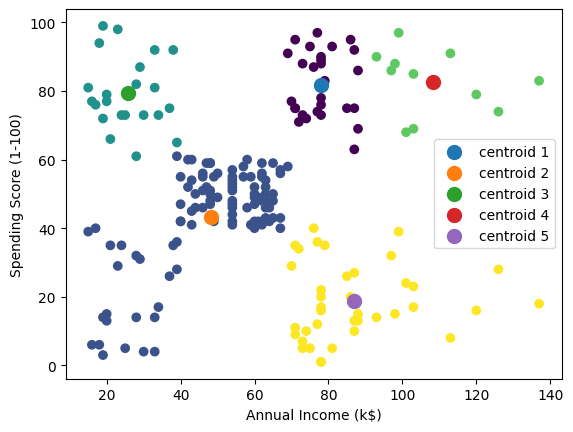

In [ ]:

plt.scatter(x=final_data["Annual Income (k$)"],y=final_data["Spending Score (1-100)"],c=final_data["prediction"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
for i,cen in enumerate(cluster):
    plt.scatter(x=cen[0],y=cen[1],s=100,label=f"centroid {i+1}")
plt.legend()
plt.show()

<h3>silhoutte Score

In [ ]:
from pyspark.ml.evaluation import ClusteringEvaluator

In [ ]:
evaluator=ClusteringEvaluator().evaluate(pred_data)
print(evaluator)

0.6095948759003074
